The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


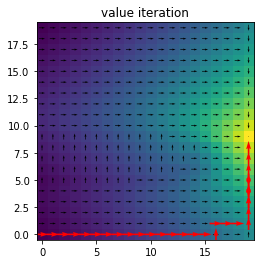

In [616]:

%load_ext autoreload
%autoreload 2

import os, sys, pdb, math, pickle, time

import matplotlib
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt
from tqdm import tqdm

from utils import generate_problem, visualize_value_function


def value_iteration(problem, reward, terminal_mask, gam):
    Ts = problem["Ts"]
    sdim, adim = Ts[0].shape[-1], len(Ts)  # state and action dimension
    V = tf.zeros([sdim])

    assert terminal_mask.ndim == 1 and reward.ndim == 2
    
    ######### Pei #########
    Ts = tf.convert_to_tensor(Ts,dtype=tf.float32)
    mask = tf.cast(terminal_mask==0, dtype=tf.float32)
    reward = tf.transpose(reward, perm=[1,0])
    ######### Pei ###########
    
    # perform value iteration
    for _ in range(1000):
        ######### Your code starts here #########
        # perform the value iteration update
        # V has shape [sdim]; sdim = n * n is the total number of grid state
        # Ts is a 4 element python list of transition matrices for 4 actions

        # reward has shape [sdim, 4] - represents the reward for each state
        # action pair

        # terminal_mask has shape [sdim] and has entries 1 for terminal states

        # compute the next value function estimate for the iteration
        # compute err = tf.linalg.norm(V_new - V_prev) as a breaking condition

        ######### Your code ends here ###########
        V_stack = tf.stack([V,V,V,V],-1)
        V_stack = tf.transpose(V_stack, perm=[1,0])
        V_prev = V
        
        V = tf.math.reduce_max(reward + tf.reshape(gam*(Ts@V_stack[:,:,None])*mask[None,:,None],[4,400]), axis=0)
        
        err = tf.linalg.norm(V-V_prev)
    
        if err < 1e-7:
            break

    return V


# value iteration ##############################################################
def main():
    # generate the problem
    problem = generate_problem()
    n = problem["n"]
    sdim, adim = n * n, 1

    # create the terminal mask vector
    terminal_mask = np.zeros([sdim])
    terminal_mask[problem["pos2idx"][19, 9]] = 1.0
    terminal_mask = tf.convert_to_tensor(terminal_mask, dtype=tf.float32)

    # generate the reward vector
    reward = np.zeros([sdim, 4])
    reward[problem["pos2idx"][19, 9], :] = 1.0
    reward = tf.convert_to_tensor(reward, dtype=tf.float32)

    gam = 0.95
    V_opt = value_iteration(problem, reward, terminal_mask, gam)

    plt.figure(213)
    visualize_value_function(np.array(V_opt).reshape((n, n)))
    plt.title("value iteration")
    plt.show()

if __name__ == "__main__":
    main()